In [1]:
from itertools import combinations, product

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from src.reinforcement.environment import ParallelEnvironmentDataset

/home/kortus/rl-track-reconstruction/venv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def plot_detector_boundaries(ax):
    r = [-1, 1]
    scale = np.array([135, 75, 50]) 
    offset = np.array([0, 0, 50]) 
    vertices = np.array(list(product(r,r,r))) * scale + offset

    for s, e in combinations(vertices, 2):
        if np.count_nonzero(s - e) == 1:
            ax.plot3D(*zip(s,e), color="r", linewidth=0.5, zorder=10)

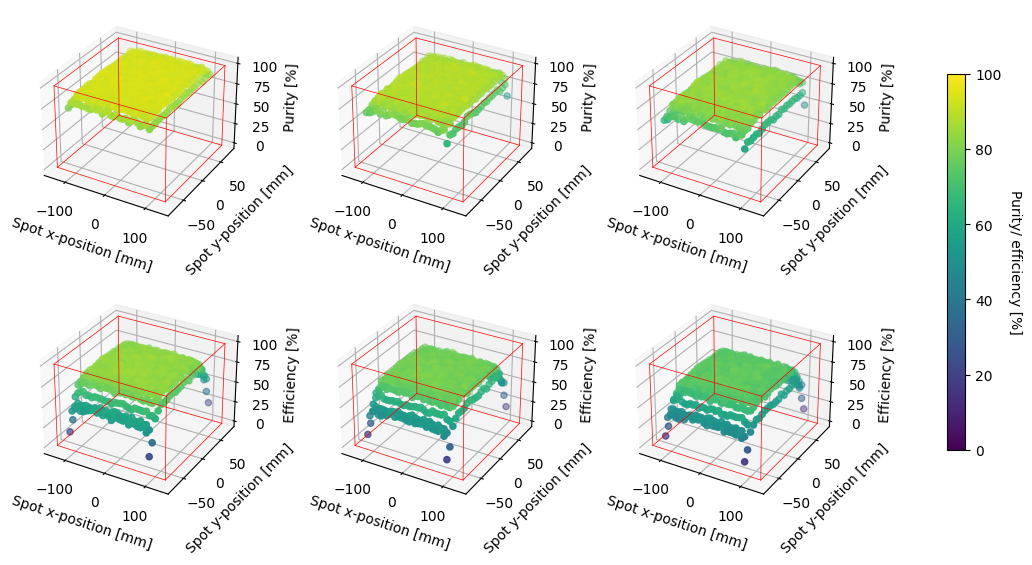

In [3]:
fig, ax = plt.subplots(2, 3, subplot_kw={"projection": "3d"}, figsize=(12, 6.5))
events = [50, 100, 150]

for i in range(3):
    df = pd.read_csv(f"models/experiment_default_rl/results_water150_spot_{events[i]}_0.txt")
    df_mean = df.groupby(["spotX", "spotY"], as_index=False).mean()
    cm1 = ax[0, i].scatter(df_mean.spotX, df_mean.spotY, df_mean.pur * 100, c=df_mean.pur * 100, vmin=0, vmax=100) #cmap="RdYlBu_r"
    cm2 = ax[1, i].scatter(df_mean.spotX, df_mean.spotY, df_mean.eff * 100, c=df_mean.eff * 100, vmin=0, vmax=100)
    ax[0,i].set_xlabel("Spot x-position [mm]")
    ax[0,i].set_ylabel("Spot y-position [mm]")
    ax[1,i].set_xlabel("Spot x-position [mm]")
    ax[1,i].set_ylabel("Spot y-position [mm]")
    ax[0,i].set_zlabel("Purity [%]")
    ax[1,i].set_zlabel("Efficiency [%]")
    plot_detector_boundaries(ax[1, i])
    plot_detector_boundaries(ax[0, i])


cbar = fig.colorbar(cm1, ax=ax[:,-1].ravel().tolist(), shrink=0.75, pad=0.2)
cbar.ax.set_ylabel('Purity/ efficiency [%]', rotation=270, labelpad=15)

bottom, top = 0.1, 0.9
left, right = 0.1, 0.78

fig.subplots_adjust(top=top, bottom=bottom, left=left, right=right, hspace=0.15, wspace=0.35)

plt.savefig("figures/performance_solid_spotwise.png", bbox_inches='tight', dpi=300)
plt.savefig("figures/performance_solid_spotwise.pdf", bbox_inches='tight')